<a href="https://colab.research.google.com/github/gamal101/RNNsentiment_analysis_/blob/main/RNN_sentiment_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
import kagglehub
import os

# Download latest version
df_path = kagglehub.dataset_download("astandrik/yelp-review")

print("Path to dataset files:", df_path)

# Find the CSV file within the downloaded directory
for filename in os.listdir(df_path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(df_path, filename)
        break  # Stop searching once found

# Load the dataset into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Keep only necessary columns
df = df[['text', 'stars']]

# Convert ratings to binary sentiment (1-2 stars → Negative, 4-5 stars → Positive)
df = df[df['stars'] != 3]  # Remove neutral reviews
df['sentiment'] = df['stars'].apply(lambda x: 1 if x > 3 else 0)

# Sample 10,000 reviews, or the maximum available if fewer
sample_size = min(10000, len(df))  # Get the smaller value between 10,000 and the available data
df = df.sample(sample_size, random_state=42)

# Split into train & test
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

# Hyperparameters
MAX_VOCAB = 10000  # Number of unique words
MAX_LEN = 100  # Max sequence length

# Tokenization
tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post', truncating='post')

print(f"Padded sample: {X_train_pad[0]}")

# Import necessary layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define the model
model = Sequential([
    Embedding(MAX_VOCAB, 64, input_length=MAX_LEN),  # Embedding layer
    SimpleRNN(64, return_sequences=False, kernel_regularizer=L2(0.001)),  # L2 Regularization to reduce overfitting
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile model with lower learning rate
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0005), metrics=['accuracy'])

# Callbacks for early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, verbose=1)

# Train the model
history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=20, batch_size=32,
    callbacks=[early_stop, reduce_lr]
)

# Save the trained model
model.save("simple_rnn_yelp_sentiment.h5")

print("Model training complete and saved as simple_rnn_yelp_sentiment.h5")


Path to dataset files: /root/.cache/kagglehub/datasets/astandrik/yelp-review/versions/1
Training samples: 6831, Testing samples: 1708
Padded sample: [   4   56  296 1773  372    1    5   28   12   34   30   57  661    3
  896   45  133 1134    7  235  779   17  432   44    7  257  372   17
    9    5  386 1689   71   23   55    2  200   44   13   93  297 2147
    9   10   55    2   52    4    8 2028 3355   15   14 1446    3   24
    6 4941  335   88   91 2582   11    5 1188 1135    3    1   53  193
    1  766   15  319   17    9   55    2 2727   13 2234    2  142   53
   14  481    3    4  608   27    2 7766  284   10    8 1514   11    2
  670  161]
Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.7912 - loss: 0.5699 - val_accuracy: 0.8009 - val_loss: 0.5333 - learning_rate: 5.0000e-04
Epoch 2/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8097 - loss: 0.4978 - val_accuracy: 0.8273 - val_loss: 0.4801 - learning_rate: 5.0000e-04
Epoch 3/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.8695 - loss: 0.3870 - val_accuracy: 0.8244 - val_loss: 0.4702 - learning_rate: 5.0000e-04
Epoch 4/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9077 - loss: 0.2930 - val_accuracy: 0.8507 - val_loss: 0.4148 - learning_rate: 5.0000e-04
Epoch 5/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9399 - loss: 0.2176 - val_accuracy: 0.8548 - val_loss: 0.4309 - learning_rate: 5.0000e-04
Epoch 6/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9528 - loss: 0.1902 - val_accuracy: 0.8730 - val_loss: 0.3944 - learning_rate: 5.0000e-04
Epoch 7/20
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9542 

Model training complete and saved as simple_rnn_yelp_sentiment.h5


In [13]:
# Load the trained model
model = tf.keras.models.load_model("simple_rnn_yelp_sentiment.h5")

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_pad, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8757 - loss: 0.3760
Test Loss: 0.3944
Test Accuracy: 0.8730


In [14]:
from sklearn.metrics import classification_report

# Predict sentiment on test data
y_pred_probs = model.predict(X_test_pad)  # Get probabilities
y_pred = (y_pred_probs > 0.5).astype(int)  # Convert probabilities to binary labels

# Print classification report
print(classification_report(y_test, y_pred))


54/54 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
              precision    recall  f1-score   support

           0       0.76      0.53      0.63       340
           1       0.89      0.96      0.92      1368

    accuracy                           0.87      1708
   macro avg       0.82      0.74      0.77      1708
weighted avg       0.87      0.87      0.86      1708



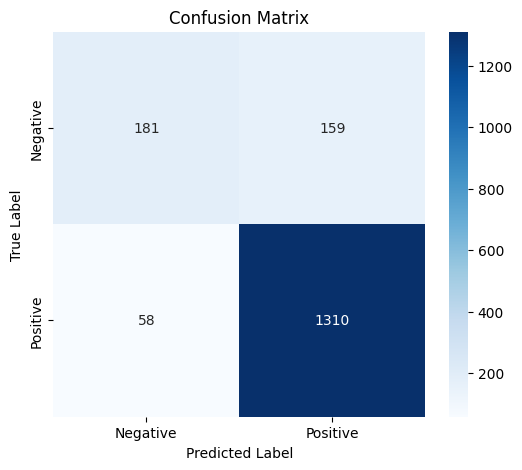

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [16]:
def predict_sentiment(review, model, tokenizer, max_len=100):
    # Convert the review to a sequence
    seq = tokenizer.texts_to_sequences([review])
    pad_seq = pad_sequences(seq, maxlen=max_len, padding='post', truncating='post')

    # Get prediction
    pred_prob = model.predict(pad_seq)[0][0]  # Get probability
    sentiment = "Positive" if pred_prob > 0.5 else "Negative"

    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment} (Confidence: {pred_prob:.4f})")
    print("-" * 60)

# Load trained model
model = tf.keras.models.load_model("simple_rnn_yelp_sentiment.h5")


In [17]:
example_reviews = [
    "This restaurant had amazing food and excellent service! I would definitely come back.",
    "The pizza was cold and the service was horrible. Never going there again!",
    "Meh, it was okay. Nothing special, but not terrible either.",
    "Absolutely loved the ambiance and the food was top-notch!",
    "The wait time was way too long, and the food was undercooked.",
    "Staff was friendly, but the food was overpriced for the quality.",
    "One of the best meals I’ve ever had! Highly recommend this place!",
    "I regret coming here. The food was bland and the portions were tiny."
]

# Test each review
for review in example_reviews:
    predict_sentiment(review, model, tokenizer)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
Review: This restaurant had amazing food and excellent service! I would definitely come back.
Predicted Sentiment: Positive (Confidence: 0.9477)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Review: The pizza was cold and the service was horrible. Never going there again!
Predicted Sentiment: Negative (Confidence: 0.0935)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
Review: Meh, it was okay. Nothing special, but not terrible either.
Predicted Sentiment: Negative (Confidence: 0.0939)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Review: Absolutely loved the ambiance and the food was top-notch!
Predicted Sentiment: Positive (Confidence: 0.9472)
------------------------------------------------------------
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Review: The wait time was way too long, and the foo